Welcome to the Jam! Basketball champion and global icon LeBron James goes on an epic adventure alongside timeless Tune Bugs Bunny in the animated/live-action event "Space Jam: A New Legacy," from director Malcolm D. Lee and an innovative filmmaking team including Ryan Coogler and Maverick Carter.

This transformational journey is a manic mashup of two worlds that reveals just how far some parents will go to connect with their kids. When LeBron and his young son Dom are trapped in a digital space by a rogue A.I., LeBron must get them home safely by leading Bugs, Lola Bunny, and the whole gang of notoriously undisciplined Looney Tunes to victory over the A.I.'s digitized champions on the court: a powered-up roster of basketball stars as you’ve never seen them before. It's Tunes versus Goons in the highest-stakes challenge of his life, that will redefine LeBron's bond with his son and shine a light on the power of being yourself. The ready-for-action Tunes destroy convention, supercharge their unique talents and surprise even "King" James by playing the game their own way.

Inspired by the film, this module explores the connection between sports (specifically basketball) and data science and machine learning. If you're a sports fan, you know that statistics (stats) about players are a huge part of the game. You might have even used stats to build fantasy leagues. This module gives you insight into how coaches and teams can use stats.

In this module, you get to explore stats related to basketball players (both human and animated). You'll learn how various stats result in a PER (player efficiency rating), which is the per-minute productivity rating for each player. Your goal is to use machine learning practices to create a clean dataset of players. The dataset is used during games to make quick decisions and optimize a team's chance of winning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('player_data.csv')
data.head()

,ID,points,possessions,team_pace,Unnamed: 4,Unnamed: 5,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,NaN,NaN,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,NaN,NaN,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,NaN,NaN,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,NaN,NaN,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,NaN,NaN,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38


#### Data Cleansing
Data cleansing is the process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted. Data cleansing is important because it improves the quality of your data, which in turn, increases the accuracy of machine learning models. In this module, you'll use data cleansing to create a clean dataset of players.

In [3]:
data.columns

Index(['ID', 'points', 'possessions', 'team_pace', 'Unnamed: 4', 'Unnamed: 5',
       'GP', 'MPG', 'TS%', 'AST', 'TO', 'USG', 'ORR', 'DRR', 'REBR', 'PER'],
      dtype='object')

In [4]:
data.dtypes

ID               int64
points         float64
possessions    float64
team_pace      float64
Unnamed: 4     float64
Unnamed: 5     float64
GP             float64
MPG            float64
TS%            float64
AST            float64
TO             float64
USG            float64
ORR            float64
DRR            float64
REBR           float64
PER            float64
dtype: object

In [5]:
#find the number of missing values in each column
data.isnull().sum()

ID              0
points          3
possessions     3
team_pace       3
Unnamed: 4     46
Unnamed: 5     46
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           46 non-null     int64  
 1   points       43 non-null     float64
 2   possessions  43 non-null     float64
 3   team_pace    43 non-null     float64
 4   Unnamed: 4   0 non-null      float64
 5   Unnamed: 5   0 non-null      float64
 6   GP           39 non-null     float64
 7   MPG          40 non-null     float64
 8   TS%          45 non-null     float64
 9   AST          45 non-null     float64
 10  TO           45 non-null     float64
 11  USG          45 non-null     float64
 12  ORR          45 non-null     float64
 13  DRR          45 non-null     float64
 14  REBR         45 non-null     float64
 15  PER          36 non-null     float64
dtypes: float64(15), int64(1)
memory usage: 5.9 KB


In [7]:
#drop columns that have no values
data.dropna(axis='columns', how='all', inplace=True)
data.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [8]:
#drop rows that have no values
data.dropna(axis='rows', how='all', inplace=True)
data.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [9]:
data

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
8,9,NaN,NaN,NaN,54.0,31.7,0.577,24.6,14.4,35.7,2.5,14.1,-4.6,4.68
9,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN


In [10]:
#drop all rows that dont have atleast 12 non-NaN values
data.dropna(thresh=12, inplace=True)
data.isna().sum()

ID             0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

In [11]:
data.head(10)

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
9,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN
10,11,1856.0,1303.8,93.4,55.0,33.6,0.563,28.9,14.7,26.7,1.4,17.3,4.3,9.67


In [12]:
#renumber the dataframe index to account for dropped rows
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           42 non-null     int64  
 1   points       42 non-null     float64
 2   possessions  42 non-null     float64
 3   team_pace    42 non-null     float64
 4   GP           36 non-null     float64
 5   MPG          37 non-null     float64
 6   TS%          42 non-null     float64
 7   AST          42 non-null     float64
 8   TO           42 non-null     float64
 9   USG          42 non-null     float64
 10  ORR          42 non-null     float64
 11  DRR          42 non-null     float64
 12  REBR         42 non-null     float64
 13  PER          33 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 4.7 KB


### Data Exploration
Data exploration is the process of analyzing data to summarize their main characteristics, often using statistical graphics and other data visualization methods. Data exploration is important because it helps you understand the data you're working with. In this module, you'll use data exploration to analyze the data you cleaned in the previous module.
- [x] still have some missing values in the data
- [x] still have some outliers in the data

In [13]:
data.describe()

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
count,42.000000,42.000000,42.000000,42.000000,36.000000,37.00000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,33.000000
mean,23.738095,1592.380952,1346.323810,106.526190,59.861111,35.27027,0.596357,26.221429,13.083333,30.478571,4.280952,14.850000,8.497619,22.594242
std,13.826555,351.876707,214.503887,6.676791,5.576239,1.91135,0.029284,5.199275,2.038282,4.919079,2.074025,7.277538,4.995876,7.255338
min,1.000000,183.000000,147.300000,89.700000,48.000000,30.50000,0.511000,14.800000,9.200000,16.500000,0.000000,0.900000,-2.900000,8.710000
25%,12.250000,1390.750000,1283.650000,102.400000,55.750000,34.10000,0.572250,23.275000,11.350000,26.975000,2.925000,8.475000,5.225000,20.120000
50%,23.500000,1680.000000,1369.800000,106.800000,60.500000,35.40000,0.604000,27.200000,13.500000,30.650000,4.650000,16.800000,9.150000,24.230000
75%,35.750000,1826.250000,1444.050000,111.950000,64.000000,36.90000,0.618750,30.550000,14.775000,34.850000,5.900000,20.325000,12.875000,28.380000
max,46.000000,2062.000000,1542.000000,118.800000,69.000000,38.80000,0.645000,33.200000,16.200000,36.700000,8.300000,29.400000,16.400000,34.260000


``` callout-info

💡 **Tip:** You can use the `describe()` method to get a summary of the data in a DataFrame.

💡 the mean for 42 players is 1592.38 points.
💡 min is 183, 25% 13990, 50% 1680
💡 75% is 1826, max is 2062

```

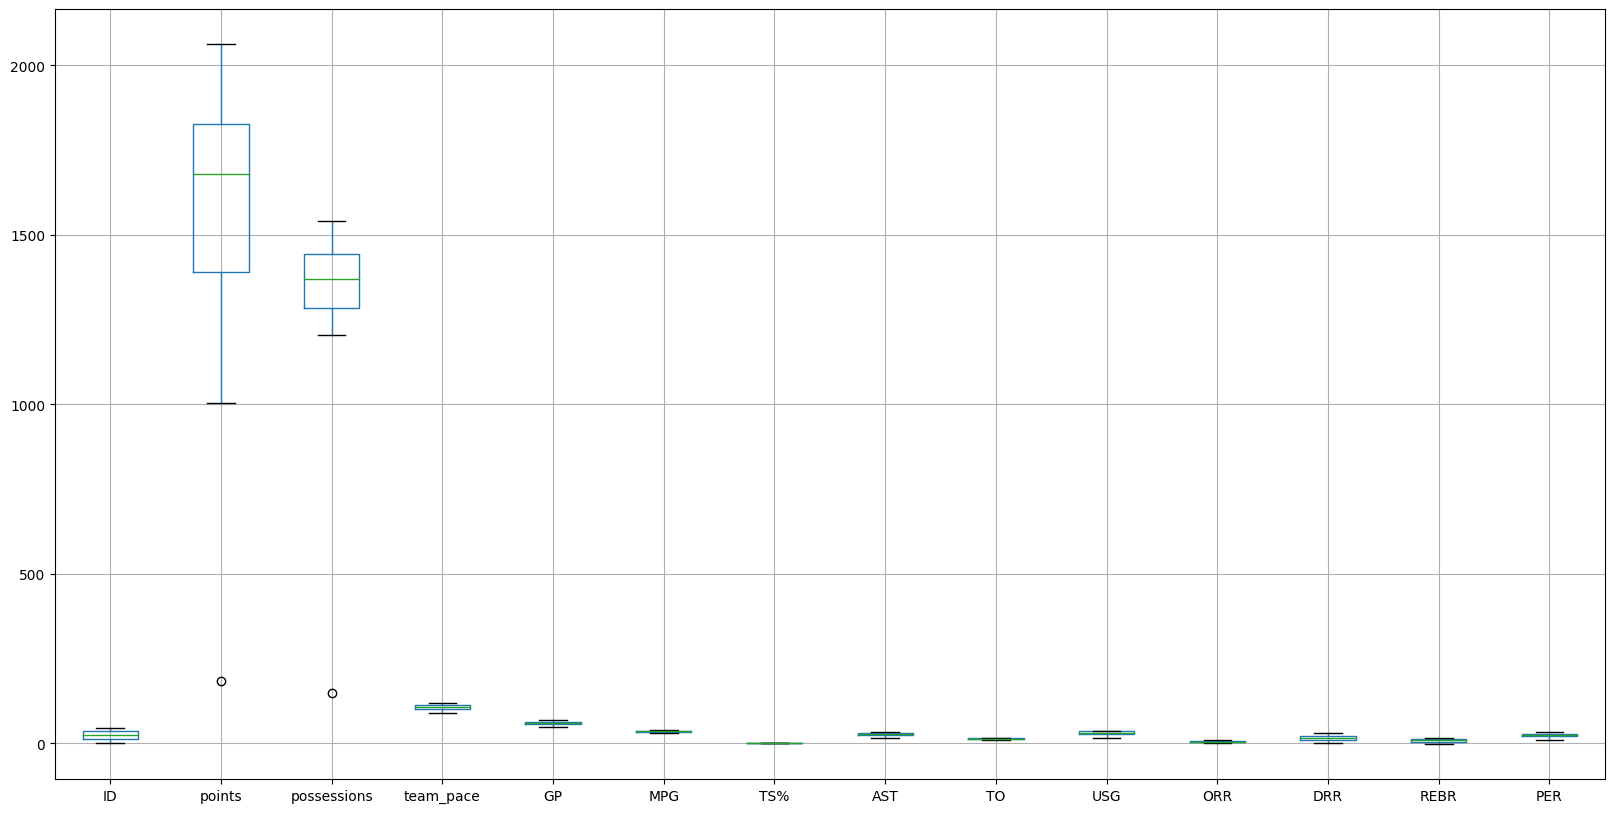

In [14]:
#boxplot of all numerical columns
data.boxplot(figsize=(20,10))
plt.show()

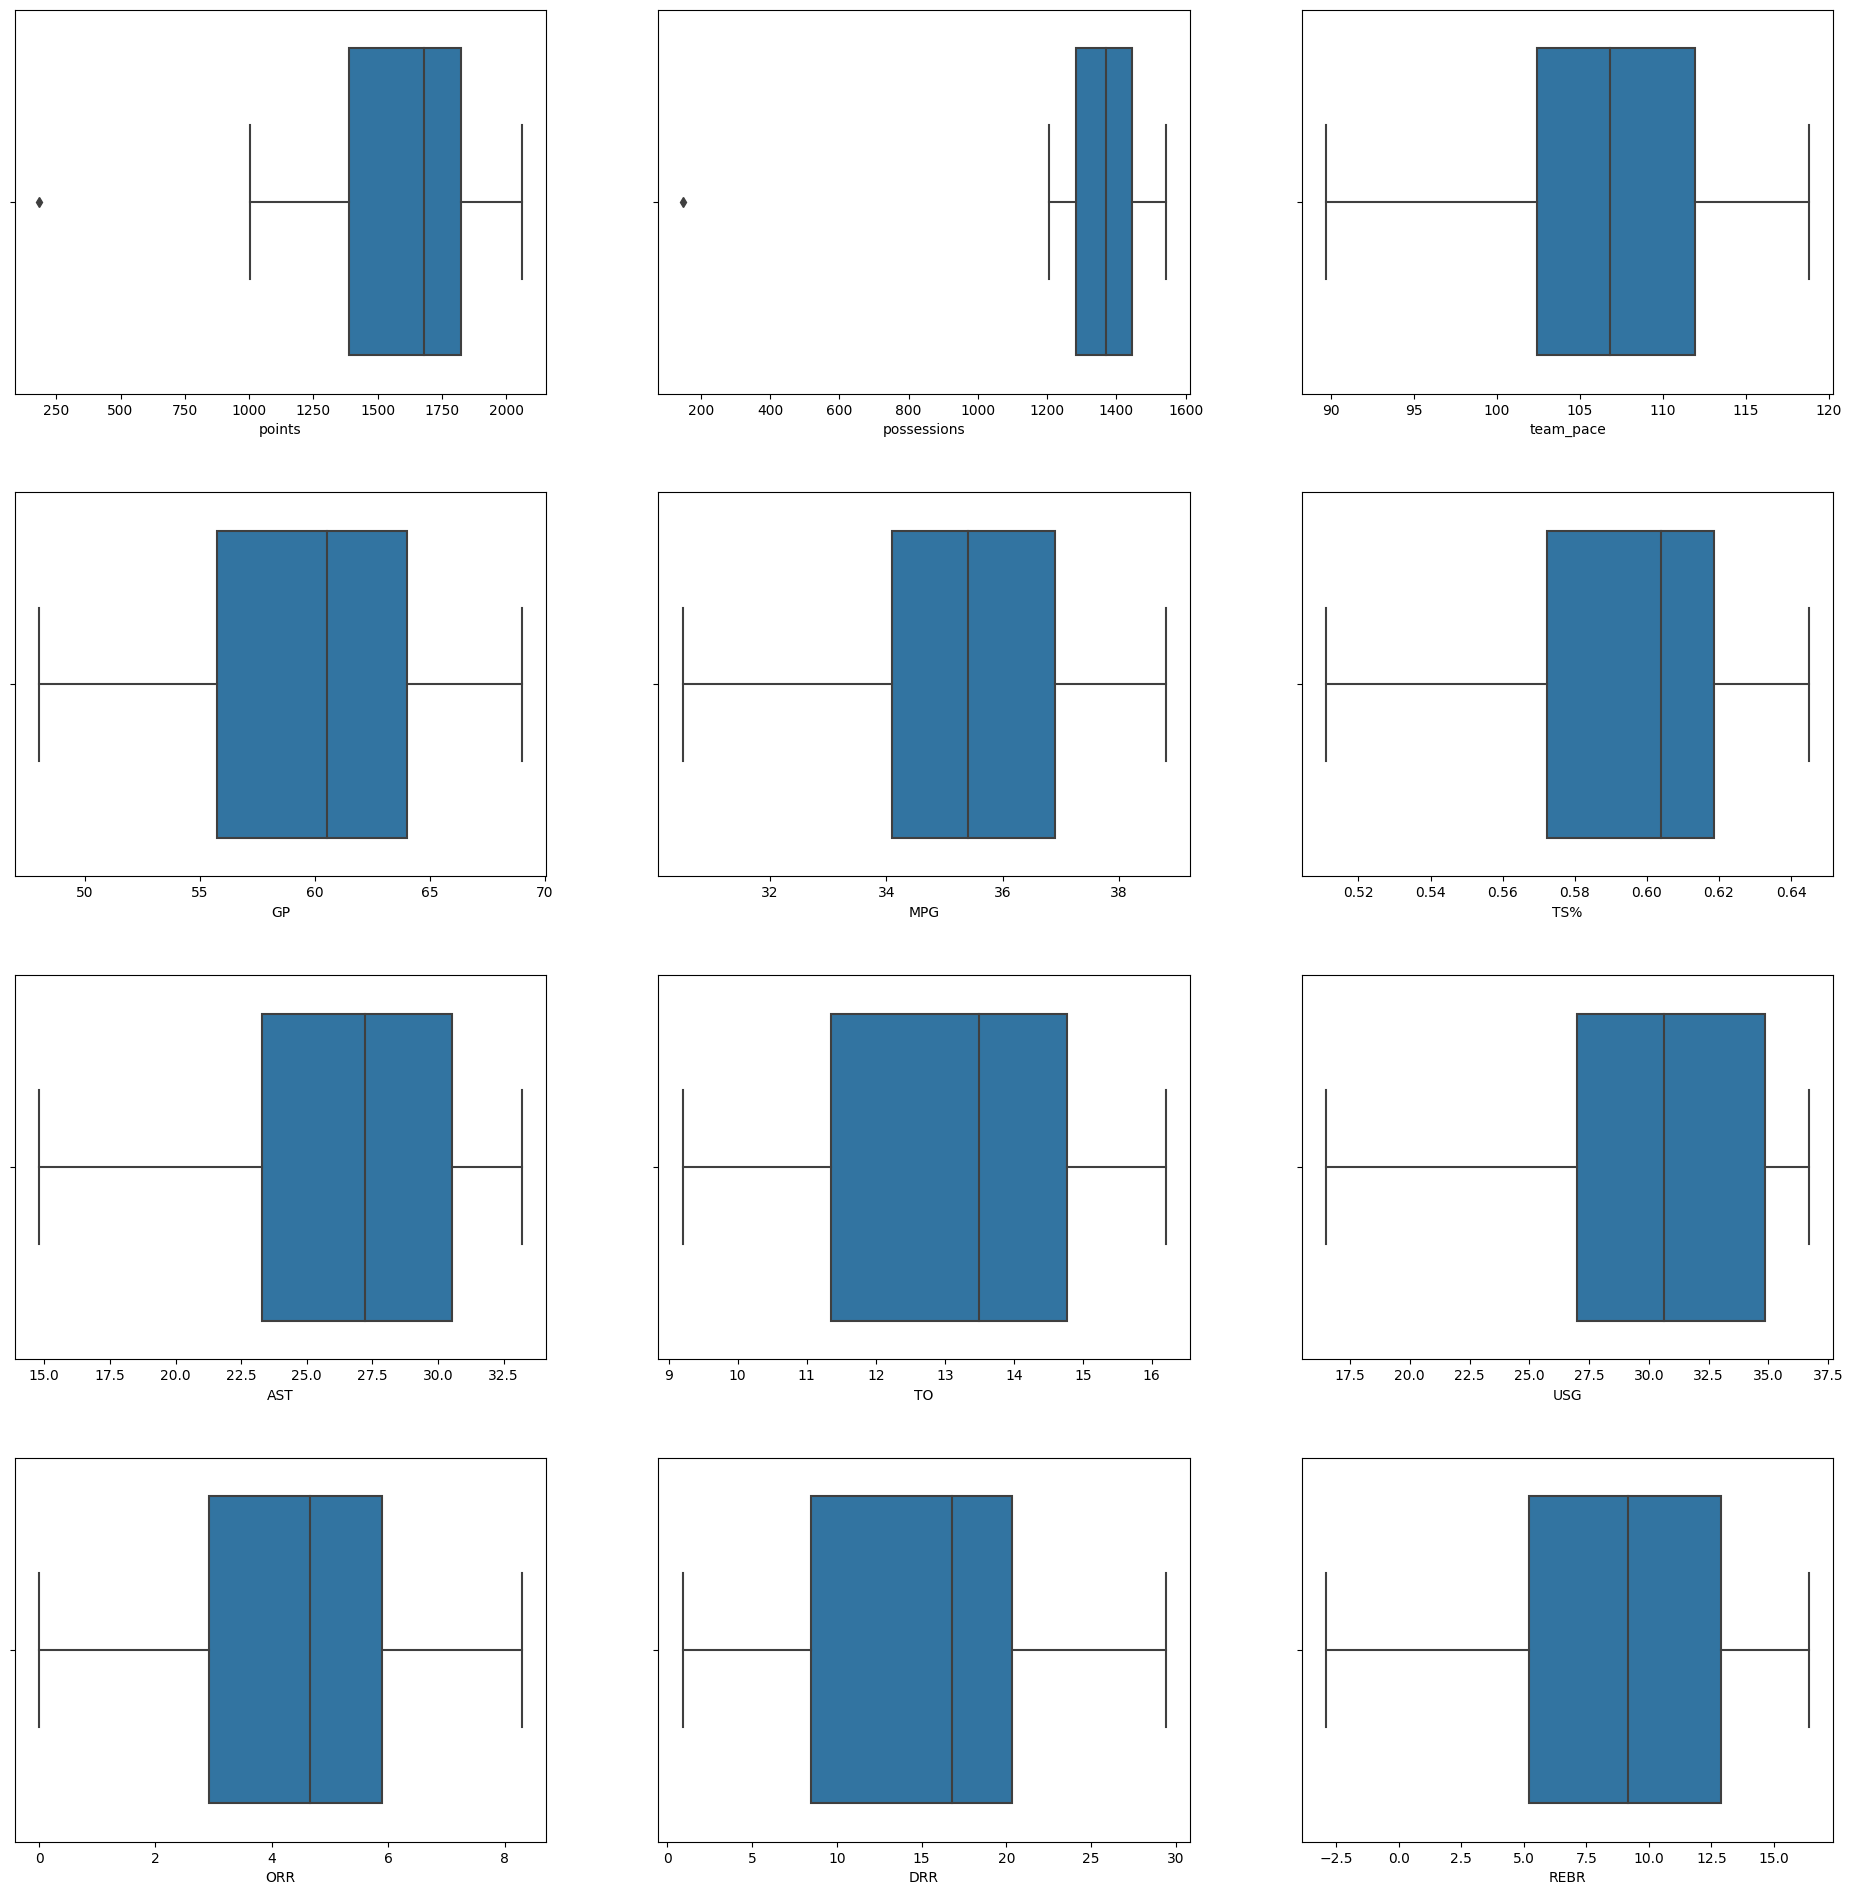

In [15]:
cols = list(data.iloc[:,1:])
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.tight_layout(pad=5.0)
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x=data[cols[i]], ax=ax)
plt.show()

In [16]:
points_outlier = data['points'].idxmin()
points_outlier

35

In [17]:
possession_outlier = data['possessions'].idxmin()
possession_outlier

35

In [18]:
data.drop(data.index[[points_outlier, possession_outlier]], inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           41 non-null     int64  
 1   points       41 non-null     float64
 2   possessions  41 non-null     float64
 3   team_pace    41 non-null     float64
 4   GP           35 non-null     float64
 5   MPG          36 non-null     float64
 6   TS%          41 non-null     float64
 7   AST          41 non-null     float64
 8   TO           41 non-null     float64
 9   USG          41 non-null     float64
 10  ORR          41 non-null     float64
 11  DRR          41 non-null     float64
 12  REBR         41 non-null     float64
 13  PER          32 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 4.6 KB


In [19]:
data.tail(10)

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
31,36,2062.0,1505.7,111.5,NaN,37.0,0.620,29.8,15.6,36.2,4.9,23.9,14.7,27.86
32,37,1845.0,1435.7,113.1,69.0,36.9,0.634,33.2,14.0,36.5,4.1,21.5,16.4,34.26
33,38,1778.0,1526.4,109.3,66.0,34.9,0.612,30.6,15.9,35.9,5.5,18.8,13.7,28.65
34,39,1901.0,1444.1,109.7,67.0,36.5,0.609,27.2,14.8,35.5,5.0,21.8,8.9,20.12
35,41,2030.0,1431.0,112.3,68.0,37.0,0.618,32.5,15.3,34.5,5.7,15.7,13.2,30.07
36,42,1631.0,1465.7,110.1,66.0,37.5,0.613,28.4,14.4,35.7,6.5,20.7,14.0,28.40
37,43,1828.0,1507.2,112.7,64.0,36.5,0.618,31.3,14.0,34.9,5.9,21.3,14.5,NaN
38,44,1821.0,1443.7,118.8,66.0,36.6,0.609,27.3,13.5,35.8,7.0,23.8,11.5,22.96
39,45,1740.0,1443.9,114.1,68.0,37.1,0.611,26.6,15.2,29.3,8.3,17.7,11.1,21.22
40,46,1993.0,1459.0,112.5,NaN,36.9,0.627,30.4,15.0,33.7,6.3,19.3,14.1,28.76


In [20]:
data.isna().sum()

ID             0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

One common strategy for imputation is to replace a missing value with the value immediately above or below it. But your missing values are for pace, points, possessions, and PER. Also, you don't know the order of the players in the DataFrame. For example, you don't know whether consecutive players are on the same team. So replacing missing values with nearby values is probably not a good strategy here.

Another common technique is to replace missing values in a column with the average value of that column. This technique might be appropriate for these columns. But you should check to see how the data in each column is distributed.

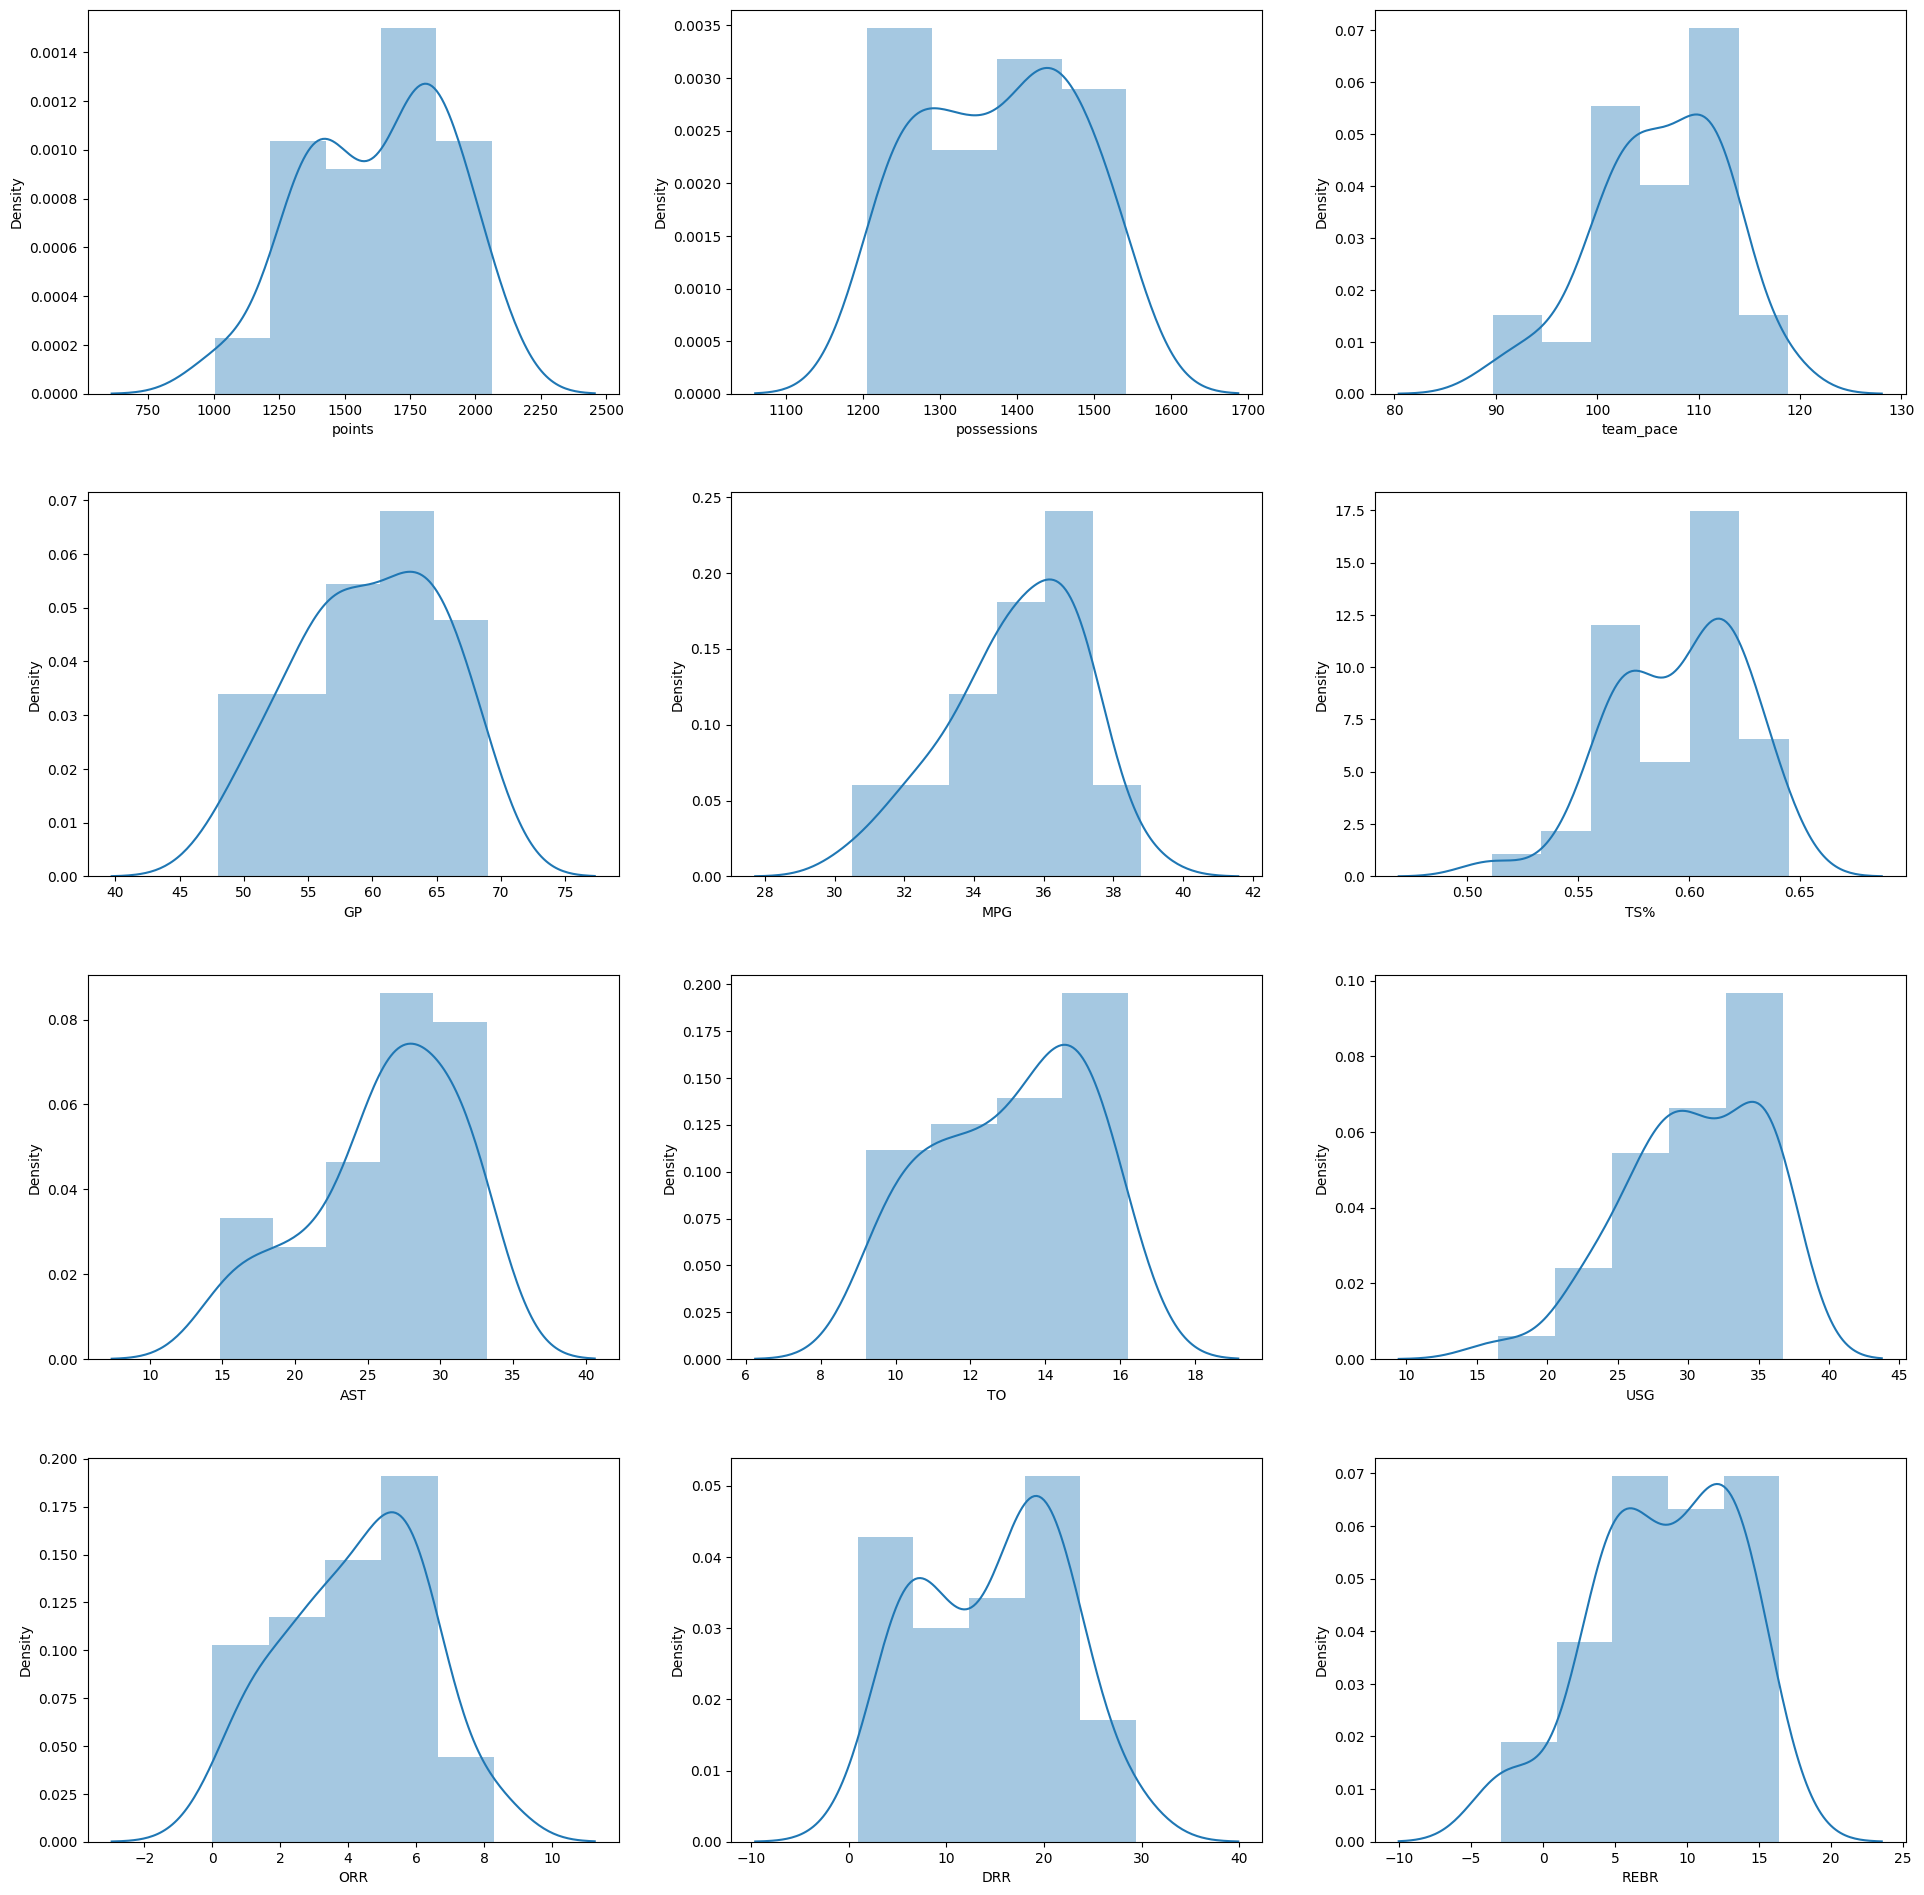

In [25]:
#create a histogram for each numerical column
cols = list(data.iloc[:,1:])
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.tight_layout(pad=5.0)
for i, ax in enumerate(axes.flatten()):
    sns.distplot(data[cols[i]], ax=ax)
plt.show()


- [x] Most of these plots are not normally distributed. Belly Shape
- [ ] So replacing missing values with the average value of the column `might not` be a good strategy.
- [x] You can use the `fillna()` method to replace missing values in a column with a specified value. For example, the following code replaces missing values in the `points` column with the average value of the column.

```python
df['points'].fillna(df['points'].mean(), inplace=True)
```